In [52]:
! pip install opencv-python

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
# import cv2
# from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
# import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

In [54]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
target_size=(256,256)
     

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size 

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    'dataset/test/', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3676 images belonging to 7 classes.
Found 168 images belonging to 7 classes.


In [58]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [59]:
train_generator.class_indices #bcheck 3la el classes el training

{'10': 0, '100': 1, '1000': 2, '20': 3, '50': 4, '500': 5, '5000': 6}

In [60]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), #convulotion layer #32 is the number of feacture extracted
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
  
    
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'), #fully connected layer
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(7, activation='softmax')
])

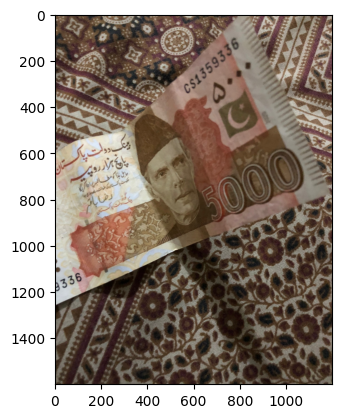

In [61]:

import numpy as np
img1 = image.load_img('5000-2.jpg')
plt.imshow(img1)
#preprocess image
img1 = image.load_img('10_1.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [62]:
EPOCHS = 30          #iteration
INIT_LR = 1e-3          #learning rate
BS = 32               #batch size

In [63]:

opt = Adam(learning_rate =INIT_LR,)
# opt = tensorflow.keras.optimizers.SGD(learning_rate=INIT_LR,)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [64]:
model.summary() #used in documentation


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [65]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=36,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/36
57/57 [==============================] - 309s 5s/step - loss: 0.4723 - accuracy: 0.1451 - val_loss: 0.4231 - val_accuracy: 0.1429
Epoch 2/36
57/57 [==============================] - 339s 6s/step - loss: 0.4400 - accuracy: 0.1539 - val_loss: 0.4182 - val_accuracy: 0.2083
Epoch 3/36
57/57 [==============================] - 511s 9s/step - loss: 0.4218 - accuracy: 0.1908 - val_loss: 0.4064 - val_accuracy: 0.1905
Epoch 4/36
57/57 [==============================] - 502s 9s/step - loss: 0.4119 - accuracy: 0.2290 - val_loss: 0.3931 - val_accuracy: 0.2262
Epoch 5/36
57/57 [==============================] - 316s 5s/step - loss: 0.4001 - accuracy: 0.2586 - val_loss: 0.3918 - val_accuracy: 0.2143
Epoch 6/36
57/57 [==============================] - 275s 5s/step - loss: 0.3934 - accuracy: 0.2774 - val_loss: 0.3787 - val_accuracy: 0.2738
Epoch 7/36
54/57 [===========================>..] - ETA: 11s - loss: 0.3811 - accuracy: 0.2982

KeyboardInterrupt: 

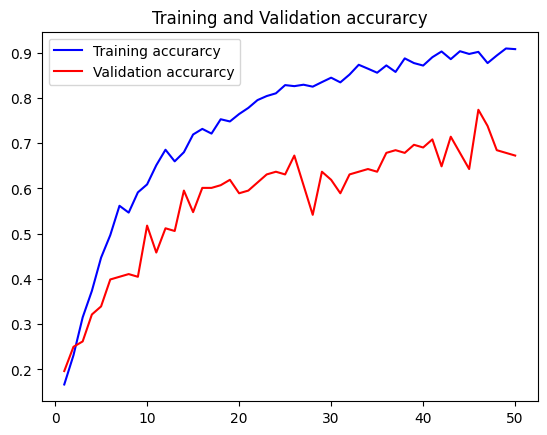

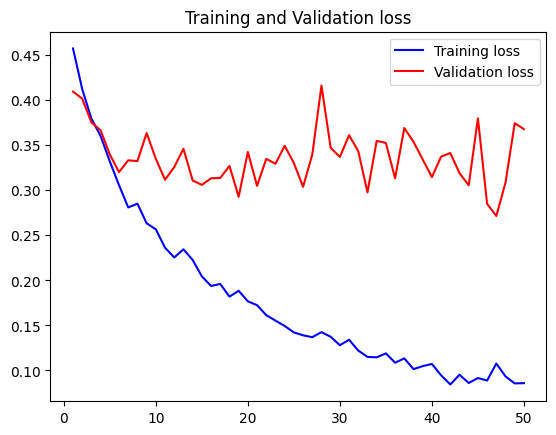

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
# model.save('Project.h5')
model.load('Project.h5')

AttributeError: 'Sequential' object has no attribute 'load'

In [ ]:

import pickle


model.save_weights('Project_weights.h5')
filename = 'currency_detection_model.sav'
pickle.dump(model, open(filename, 'wb'))
# model.load_weights('Project_weights.h5')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json       

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes
     

{'10': 0, '100': 1, '1000': 2, '20': 3, '50': 4, '500': 5, '5000': 6}

In [ ]:
Classes = ["10 PKR","20 PKR","50 PKR","100 PKR","500 PKR" ,"1000 PKR","5000 PKR"]

1/1 [==============================] - 0s 63ms/step
5000 PKR


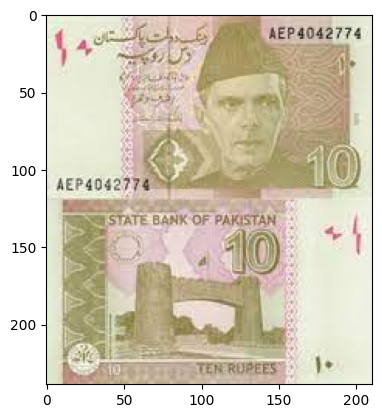

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = keras.utils.load_img(img_path, target_size=(256, 256))
    x = keras.utils.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img='10_5.jpg'
result = model.predict([prepare(img)])
Pound=keras.utils.load_img(img)
plt.imshow(Pound) 
print (Classes[np.argmax(result)])